<a href="https://colab.research.google.com/github/suke-bhargav/NEW/blob/main/kaggleanalysisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import os
import tensorflow as tf
import shutil
import pandas as pd
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [2]:
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)


/content


In [3]:
from google.colab import files
from os import environ

In [4]:
!pip install -q kaggle

In [5]:
# upload kaggle API key
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [6]:
# define kaggle config folder
! mkdir "./kaggle" && mv "./kaggle.json" "./kaggle/kaggle.json"
environ['KAGGLE_CONFIG_DIR'] = './kaggle'

# hide kaggle API key for other users
! chmod 600 ./kaggle/kaggle.json


In [7]:
# fetch kaggle dataset
!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset
!unzip "./*.zip" && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/2-012.jpg  

In [8]:
csv_path = '/content/csv/meta.csv'
df_meta = pd.read_csv(csv_path)
dicom_data = pd.read_csv('/content/csv/dicom_info.csv')

In [9]:
image_dir = '/content/jpeg'
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.iloc[0]
cropped_images.iloc[0]

'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg'

In [10]:
full_mammogram_images.shape

(2857,)

In [11]:
roi_mask_images.shape

(3247,)

In [12]:
cropped_images.shape

(3567,)

In [13]:
full_mammogram_dict = dict()
cropped_dict = dict()
roi_mask_dict = dict()

for dicom in full_mammogram_images:
    # print(dicom)
    key = dicom.split("/")[3]
    # print(key)
    full_mammogram_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[3]
    cropped_dict[key] = dicom
for dicom in roi_mask_images:
    key = dicom.split("/")[3]
    roi_mask_dict[key] = dicom

In [14]:
sys.getsizeof(full_mammogram_dict)

147552

In [72]:
mass_train_data = pd.read_csv('/content/csv/mass_case_description_test_set.csv')
mass_test_data = pd.read_csv('/content/csv/mass_case_description_test_set.csv')
calc_train_data = pd.read_csv('/content/csv/calc_case_description_train_set.csv')
calc_test_data = pd.read_csv('/content/csv/calc_case_description_train_set.csv')

In [73]:
def filter_dataframe_by_base_directory(df):
    base_directory = '/content/jpeg'

    # Check if all three columns start with the base directory
    mask = (
        df['image file path'].str.startswith(base_directory) &
        df['cropped image file path'].str.startswith(base_directory) &
        df['ROI mask file path'].str.startswith(base_directory)
    )

    # Keep only the rows where all three columns start with the base directory
    filtered_df = df[mask]

    return filtered_df

MASS

In [74]:
def fix_image_path_mass(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]

        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [75]:
fix_image_path_mass(mass_train_data)

In [76]:
fix_image_path_mass(mass_test_data)

CALC

In [77]:
def fix_image_path_calc(dataset):
    for i, img in enumerate(dataset.values):
        img_name = img[11].split("/")[2]
        if img_name in full_mammogram_dict:
            dataset.iloc[i, 11] = full_mammogram_dict[img_name]

        img_name = img[12].split("/")[2]
        if img_name in cropped_dict:
            dataset.iloc[i, 12] = cropped_dict[img_name]

        img_name = img[13].split("/")[2]
        if img_name in roi_mask_dict:
            dataset.iloc[i, 13] = roi_mask_dict[img_name]

In [78]:
fix_image_path_calc(calc_train_data)

In [79]:
fix_image_path_mass(calc_test_data)

In [80]:
mass_train_data.pathology.unique()

array(['MALIGNANT', 'BENIGN', 'BENIGN_WITHOUT_CALLBACK'], dtype=object)

MASS

In [81]:
mass_train = mass_train_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})
mass_test = mass_test_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})


CALC

In [82]:
calc_train = calc_train_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                             'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})
calc_test = calc_test_data.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'breast density':'breast_density',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'calc type': 'calc_type',
                                           'calc distribution': 'calc_distribution',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

In [83]:
def count_jpg_files_in_directory(directory):
    total_jpg_files = 0

    # Walk through the directory and count .jpg files
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg'):
                total_jpg_files += 1

    return total_jpg_files

# Example usage:
base_directory = '/content/jpeg'
total_jpg_files = count_jpg_files_in_directory(base_directory)

print(f'Total number of .jpg files in {base_directory}: {total_jpg_files}')

Total number of .jpg files in /content/jpeg: 10237


In [84]:
mass_train

,patient_id,breast_density,left_or_right_breast,image_view,abnormality_id,abnormality_type,mass_shape,mass_margins,assessment,pathology,subtlety,image_file_path,cropped_image_file_path,ROI_mask_file_path
0,P_00016,4,LEFT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2450631...,Mass-Test_P_00016_LEFT_CC_1/1.3.6.1.4.1.9590.1...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3082058...
1,P_00016,4,LEFT,MLO,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.8595221...,Mass-Test_P_00016_LEFT_MLO_1/1.3.6.1.4.1.9590....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3814401...
2,P_00017,2,LEFT,CC,1,mass,ROUND,CIRCUMSCRIBED,4,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2213118...,Mass-Test_P_00017_LEFT_CC_1/1.3.6.1.4.1.9590.1...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2121430...
3,P_00017,2,LEFT,MLO,1,mass,ROUND,ILL_DEFINED,4,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2399490...,Mass-Test_P_00017_LEFT_MLO_1/1.3.6.1.4.1.9590....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1540304...
4,P_00032,3,RIGHT,CC,1,mass,ROUND,OBSCURED,0,BENIGN,2,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2150818...,Mass-Test_P_00032_RIGHT_CC_1/1.3.6.1.4.1.9590....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1995930...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,P_01825,2,RIGHT,MLO,1,mass,LOBULATED,MICROLOBULATED,3,BENIGN_WITHOUT_CALLBACK,3,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4045773...,Mass-Test_P_01825_RIGHT_MLO_1/1.3.6.1.4.1.9590...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4080769...
374,P_01833,2,RIGHT,MLO,1,mass,IRREGULAR,ILL_DEFINED,5,MALIGNANT,5,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3554643...,Mass-Test_P_01833_RIGHT_MLO_1/1.3.6.1.4.1.9590...,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.1832507...
375,P_01865,2,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED,4,MALIGNANT,2,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.4130661...,Mass-Test_P_01865_LEFT_MLO_1/1.3.6.1.4.1.9590....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3583027...
376,P_01912,3,RIGHT,CC,1,mass,IRREGULAR,SPICULATED,5,MALIGNANT,4,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.3958064...,Mass-Test_P_01912_RIGHT_CC_1/1.3.6.1.4.1.9590....,/content/jpeg/1.3.6.1.4.1.9590.100.1.2.2994793...


In [85]:
mass_train.image_file_path[0]

'/content/jpeg/1.3.6.1.4.1.9590.100.1.2.245063149211255120613007755642780114172/1-271.jpg'

In [87]:
mass_train.ROI_mask_file_path[0]

'/content/jpeg/1.3.6.1.4.1.9590.100.1.2.30820586311062570442302321942433426184/1-083.jpg'

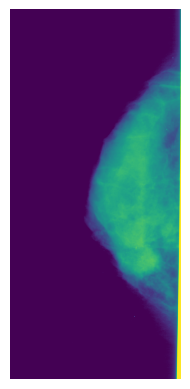

In [86]:
img1 = mpimg.imread(mass_train.image_file_path[0])
plt.imshow(img1)
plt.axis('off')
plt.show()

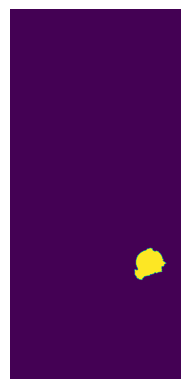

In [88]:
img2= mpimg.imread(mass_train.ROI_mask_file_path[0])
plt.imshow(img2)
plt.axis('off')
plt.show()

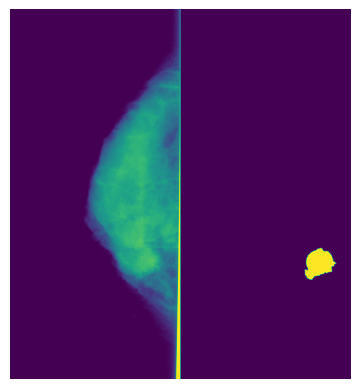

In [89]:
hshow= cv2.hconcat([img1,img2]);
plt.imshow(hshow)
plt.axis('off')
plt.show()

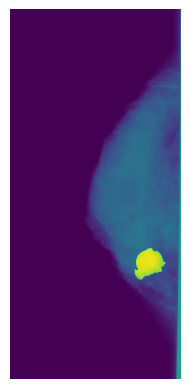

In [90]:
out=cv2.addWeighted(img1,0.5,img2,0.5,0)
plt.imshow(out)
plt.axis('off')
plt.show()